In [69]:
# Библиотеки
# Работа с данными
import pandas as pd
import numpy as np

# Визуализация
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Обучение
from sklearn.model_selection import train_test_split

### 1. Загрузка данных

In [70]:
names = ['name','landmass','zone','area','population','language','religion','bars','stripes',
         'colours','red','green','blue','gold','white','black','orange','mainhue','circles',
         'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate',
         'text','topleft','botright']

In [71]:
data = pd.read_table('flag.data', sep=',', names=names) #index_col=0
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


### 2. Описательный анализ предложенных данных

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [73]:
'''religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
               5=Ethnic, 6=Marxist, 7=Others'''
data[['landmass','religion']].groupby(['religion']).count()

,landmass
religion,
0,40
1,60
2,36
3,8
4,4
5,27
6,15
7,4


Для некоторых религий в выборке слишком мало стран для анализа,
что не позволит обучить корректно обучить алгоритм на их определение.

В связи явным с недостатком данных имеет смысл объединить часть религий, если они похожи друг на драгу.
А те данные, которые отражают малые группы в массиве данных, стоит удалить, так как их наличие будет 
максимизировать ошибку модели

1. Христианство надо объединить
2. Также объединить буддизм и хинди
3. Другие религии удалить

In [74]:
data['religion'] = data['religion'].replace(1,0)
data['religion'] = data['religion'].replace(4,3)
data = data.drop(np.where(data['religion']==7)[0])

In [75]:
data[['landmass','religion']].groupby(['religion']).count()

,landmass
religion,
0,100
2,36
3,12
5,27
6,15


### 3. Подготовка категориальных данных

Надо обратно превратить поля 'landmass','zone','language' в категориальные, что провести их корректную предобработку

In [76]:
d = {'id': [1,2,3,4,5,6], 'new_landmass': ['America', 'S.America', 'Europe', 'Africa', 'Asia', 'Oceania']}
new_landmass = pd.DataFrame(data=d)
new_landmass

data = pd.merge(data, new_landmass, left_on='landmass', right_on='id').drop('id', axis=1)
data

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,new_landmass
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,1,0,0,1,0,0,black,green,Asia
1,Bahrain,5,1,1,0,8,2,0,0,2,...,0,0,0,0,0,0,0,white,red,Asia
2,Bangladesh,5,1,143,90,6,2,0,0,2,...,0,0,0,0,0,0,0,green,green,Asia
3,Bhutan,5,1,47,1,10,3,0,0,4,...,0,0,0,0,0,1,0,orange,red,Asia
4,Brunei,5,1,6,0,10,2,0,0,4,...,0,0,0,1,1,1,1,white,gold,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Peru,2,3,1285,14,2,0,3,0,2,...,0,0,0,0,0,0,0,red,red,S.America
186,Surinam,2,4,63,0,6,0,0,5,4,...,0,1,0,0,0,0,0,green,green,S.America
187,Trinidad-Tobago,2,4,5,1,1,0,0,0,3,...,0,0,0,1,0,0,0,white,white,S.America
188,Uruguay,2,3,178,3,2,0,0,9,3,...,1,1,0,0,0,0,0,white,white,S.America


In [77]:
d = {'id': [1,2,3,4], 'new_zone': ['NE', 'SE', 'SW', 'NW']}
new_zone = pd.DataFrame(data=d)

data = pd.merge(data, new_zone, left_on='zone', right_on='id').drop('id', axis=1)
data

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,sunstars,crescent,triangle,icon,animate,text,topleft,botright,new_landmass,new_zone
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,1,0,0,1,0,0,black,green,Asia,NE
1,Bahrain,5,1,1,0,8,2,0,0,2,...,0,0,0,0,0,0,white,red,Asia,NE
2,Bangladesh,5,1,143,90,6,2,0,0,2,...,0,0,0,0,0,0,green,green,Asia,NE
3,Bhutan,5,1,47,1,10,3,0,0,4,...,0,0,0,0,1,0,orange,red,Asia,NE
4,Brunei,5,1,6,0,10,2,0,0,4,...,0,0,1,1,1,1,white,gold,Asia,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Ecuador,2,3,284,8,2,0,0,3,3,...,0,0,0,0,0,0,gold,red,S.America,SW
186,Falklands-Malvinas,2,3,12,0,1,0,0,0,6,...,0,0,0,1,1,1,white,blue,S.America,SW
187,Parguay,2,3,407,3,2,0,0,3,6,...,1,0,0,1,1,1,red,blue,S.America,SW
188,Peru,2,3,1285,14,2,0,3,0,2,...,0,0,0,0,0,0,red,red,S.America,SW


In [78]:
d = {'id': [1,2,3,4,5,6,7,8,9,10], 'new_language': ['English', 'Spanish', 'French', 'German', 'Slavic', 'Other' 
               'Indo-European', 'Chinese', 'Arabic', 
               'Japanese/Turkish/Finnish/Magyar', 'Others']}
new_language = pd.DataFrame(data=d)

data = pd.merge(data, new_language, left_on='language', right_on='id').drop('id', axis=1)
data

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,crescent,triangle,icon,animate,text,topleft,botright,new_landmass,new_zone,new_language
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,black,green,Asia,NE,Others
1,Bhutan,5,1,47,1,10,3,0,0,4,...,0,0,0,1,0,orange,red,Asia,NE,Others
2,Brunei,5,1,6,0,10,2,0,0,4,...,0,1,1,1,1,white,gold,Asia,NE,Others
3,Burma,5,1,678,35,10,3,0,0,3,...,0,0,1,1,0,blue,red,Asia,NE,Others
4,Kampuchea,5,1,181,6,10,3,0,0,2,...,0,0,1,0,0,red,red,Asia,NE,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,Chile,2,3,757,11,2,0,0,2,3,...,0,0,0,0,0,blue,red,S.America,SW,Spanish
186,Ecuador,2,3,284,8,2,0,0,3,3,...,0,0,0,0,0,gold,red,S.America,SW,Spanish
187,Parguay,2,3,407,3,2,0,0,3,6,...,0,0,1,1,1,red,blue,S.America,SW,Spanish
188,Peru,2,3,1285,14,2,0,3,0,2,...,0,0,0,0,0,red,red,S.America,SW,Spanish


In [79]:
data = data.drop(['landmass','zone','language'], axis=1)

In [80]:
data = data.rename(columns={'new_landmass': 'landmass', 'new_zone': 'zone', 'new_language': 'language'})

In [81]:
# выделение категориальных и количественных данных
cat_col = [i for i in data.columns if data[i].dtype.name == 'object']
num_col = [i for i in data.columns if data[i].dtype.name != 'object']

print(cat_col)
print(num_col)

['name', 'mainhue', 'topleft', 'botright', 'landmass', 'zone', 'language']
['area', 'population', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text']


In [82]:
# Проведение get_dummies для категориальных данных
dummies = pd.get_dummies(data[cat_col])
dummies.columns

Index(['name_Afghanistan', 'name_Albania', 'name_Algeria',
       'name_American-Samoa', 'name_Andorra', 'name_Angola', 'name_Anguilla',
       'name_Antigua-Barbuda', 'name_Argentina', 'name_Argentine',
       ...
       'language_Arabic', 'language_Chinese', 'language_English',
       'language_French', 'language_German',
       'language_Japanese/Turkish/Finnish/Magyar',
       'language_OtherIndo-European', 'language_Others', 'language_Slavic',
       'language_Spanish'],
      dtype='object', length=233)

In [83]:
# Выделение целевой переменной и объединение подготовленных данных

Y = data['religion']

data = pd.concat([data[num_col], dummies], axis=1)
data = data.drop('religion', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Columns: 255 entries, area to language_Spanish
dtypes: int64(22), uint8(233)
memory usage: 77.4 KB


In [84]:
data.head()

,area,population,bars,stripes,colours,red,green,blue,gold,white,...,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Japanese/Turkish/Finnish/Magyar,language_OtherIndo-European,language_Others,language_Slavic,language_Spanish
0,648,16,0,3,5,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,47,1,0,0,4,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,6,0,0,0,4,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,678,35,0,0,3,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,181,6,0,0,2,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### 4. Корреляция и визуализация взаимосязей

In [85]:
num_col_corr = ['area',
                 'population',
                 'bars',
                 'stripes',
                 'colours',
                 'red',
                 'green',
                 'blue',
                 'gold',
                 'white',
                 'black',
                 'orange',
                 'circles',
                 'crosses',
                 'saltires',
                 'quarters',
                 'sunstars',
                 'crescent',
                 'triangle',
                 'icon',
                 'animate',
                 'text']

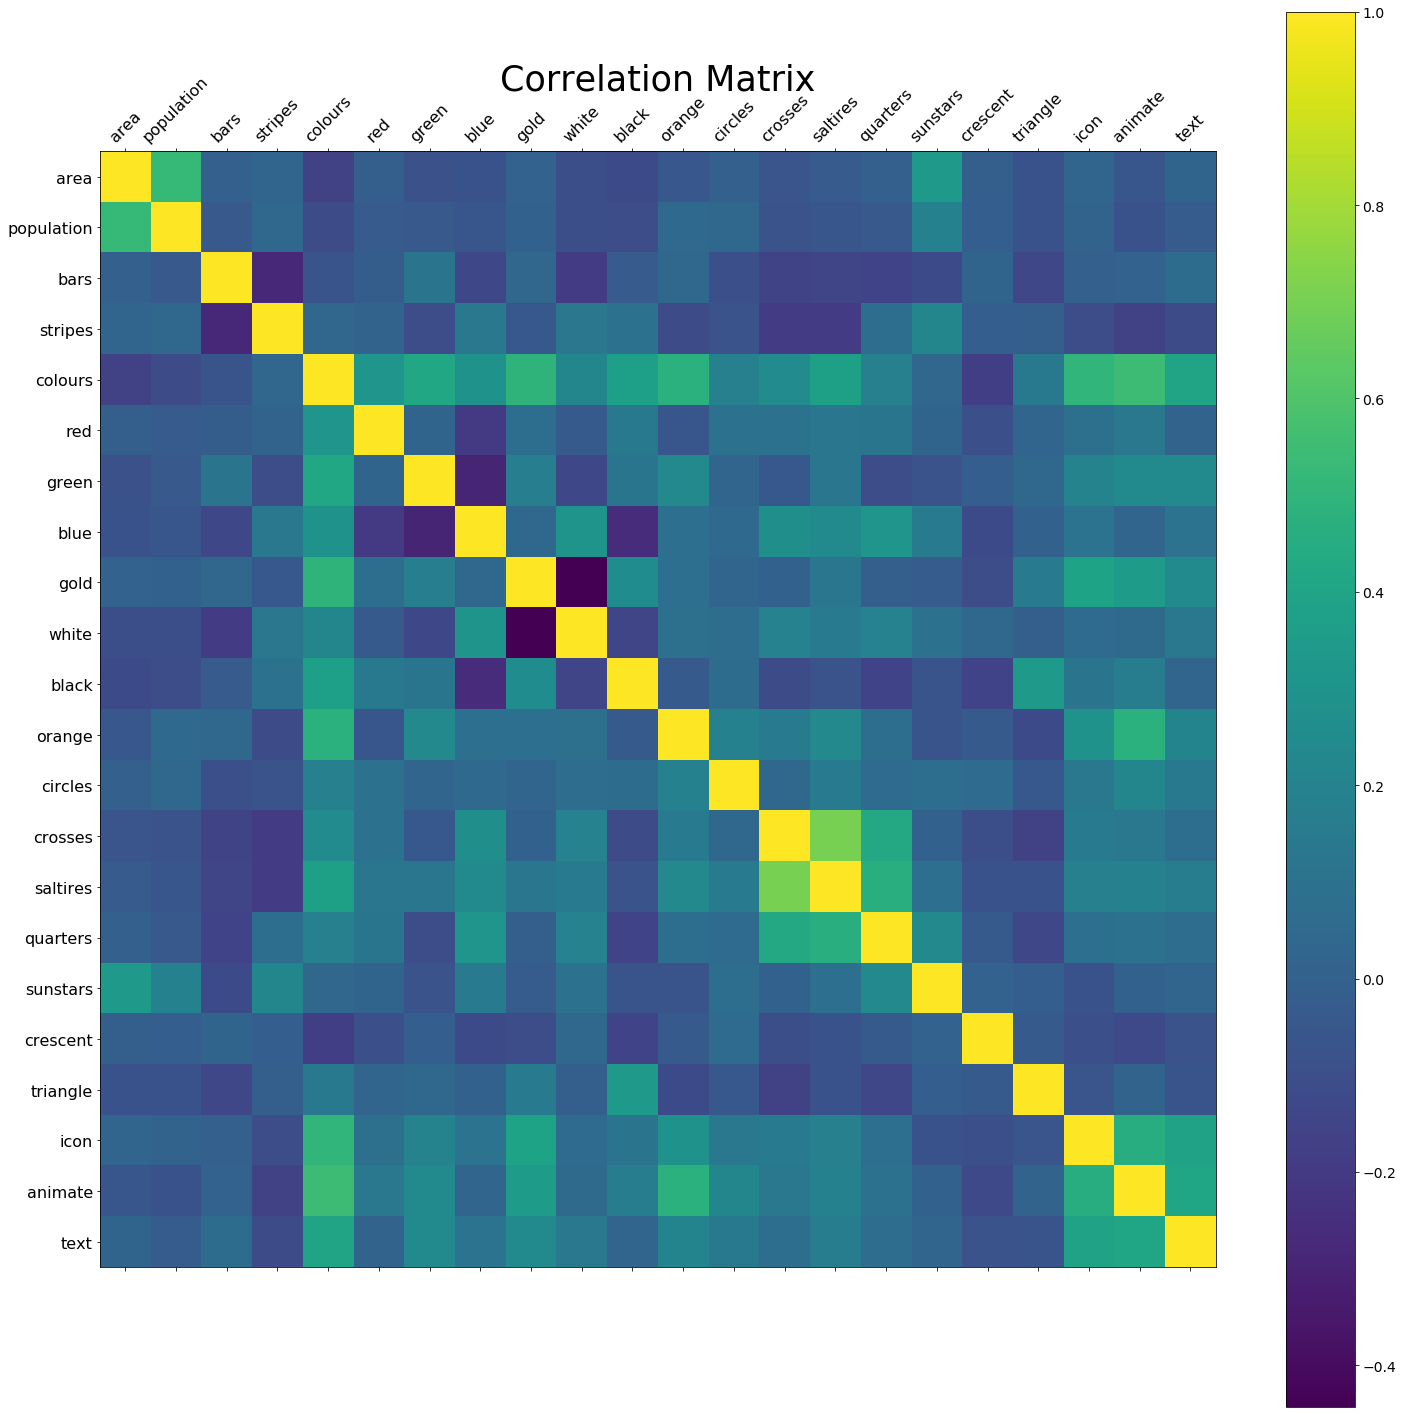

In [86]:
# корреляционная матрица
f = plt.figure(figsize=(25, 25))
plt.matshow(data[num_col_corr].corr(), fignum=f.number)
plt.xticks(range(data[num_col_corr].shape[1]), data[num_col_corr].columns, fontsize=16, rotation=45)
plt.yticks(range(data[num_col_corr].shape[1]), data[num_col_corr].columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=35);

In [87]:
# Выделяем пары признаков с наибольшей положительной и отрицательной корреляцией
plus_corr = []
minus_corr = []
for i in data[num_col_corr].columns:
    plus_corr.append(data[num_col_corr].corr()[i][(data[num_col_corr].corr()[i]>=0.5)&(data.corr()[i]<1)])
    minus_corr.append(data[num_col_corr].corr()[i][(data[num_col_corr].corr()[i]<=-0.5)&(data.corr()[i]>-1)])

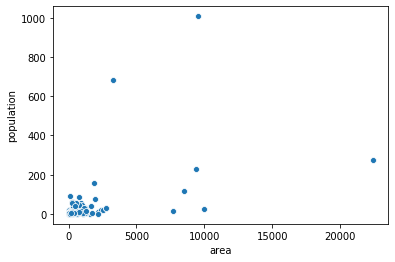

In [88]:
# Наиболее показательная взаимосвязь заметна между площадью страы и ее населением; Корреляция очевидно положительная
sns.scatterplot(data.area, data.population)

### Подготовка данных для обучения

In [89]:
# разделение выборок на обучающую и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size= 0.3)

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

### 7,8. Мультиклассовая классификация (с использованием кросс-валидации)

In [102]:
# Используем Grid Search, чтобы определить оптимальные параметры: глубину дерева, кол-во ветвлений
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

depths = np.arange(1,20)
leaf = np.arange(1,20)
criterion = {'gini', 'entropy'}
splitter = {'best', 'random'}

params = {
          'max_depth': depths,
          'min_samples_leaf':leaf
         }

grid_selection = GridSearchCV(DecisionTreeClassifier(), params, cv=3)
grid_selection.fit(X_train_sc, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [123]:
results = pd.DataFrame(grid_selection.cv_results_)
results[['param_max_depth', 'mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)

,param_max_depth,mean_test_score,params
66,4,0.744108,"{'max_depth': 4, 'min_samples_leaf': 10}"
332,18,0.744108,"{'max_depth': 18, 'min_samples_leaf': 10}"
313,17,0.744108,"{'max_depth': 17, 'min_samples_leaf': 10}"
85,5,0.744108,"{'max_depth': 5, 'min_samples_leaf': 10}"
256,14,0.744108,"{'max_depth': 14, 'min_samples_leaf': 10}"
...,...,...,...
130,7,0.631650,"{'max_depth': 7, 'min_samples_leaf': 17}"
172,10,0.624579,"{'max_depth': 10, 'min_samples_leaf': 2}"
77,5,0.624411,"{'max_depth': 5, 'min_samples_leaf': 2}"
153,9,0.609259,"{'max_depth': 9, 'min_samples_leaf': 2}"


In [105]:
# Наилучшие показатели получилилсь при глубине дерева 4
grid_selection.best_params_

{'max_depth': 4, 'min_samples_leaf': 10}

In [115]:
dtc = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = 4)
dtc.fit(X_train_sc, y_train)

dtc.score(X_test_sc, y_test)

0.7017543859649122

In [116]:
y_pred_proba = dtc.predict_proba(X_test_sc)
y_pred = dtc.predict(X_test_sc)

<BarContainer object of 8 artists>

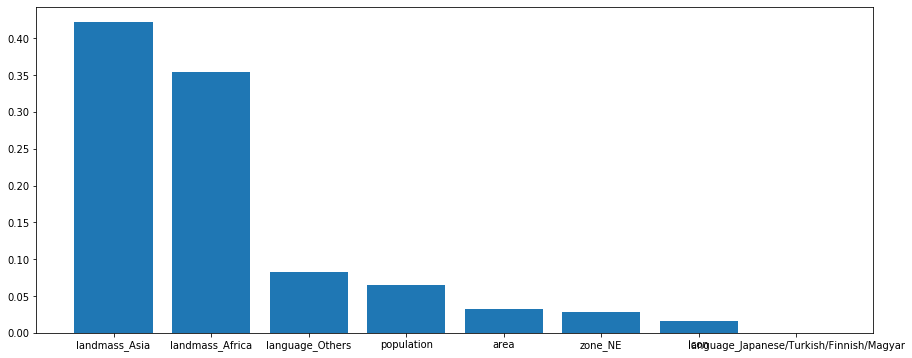

In [117]:
# Выводим рейтинг важности фич
feature_importances_ = pd.DataFrame(data = dtc.feature_importances_, columns= ['feature_importances_'])
columns = pd.DataFrame(data = data.columns, columns=['columns'])
feature_importances  = pd.concat([columns,feature_importances_], axis=1).sort_values('feature_importances_', ascending=False).head(8)

f = plt.figure(figsize=(15, 6))
plt.bar(feature_importances['columns'], feature_importances['feature_importances_'])

In [118]:
from sklearn.metrics import accuracy_score

print (f"ACCURACY  : {accuracy_score(y_test, y_pred):.3f}")

ACCURACY  : 0.702


In [119]:
from sklearn.metrics import classification_report
report = classification_report(y_test, dtc.predict(X_test_sc))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           2       0.50      0.82      0.62        11
           3       0.00      0.00      0.00         6
           5       0.56      0.83      0.67         6
           6       0.00      0.00      0.00         5

    accuracy                           0.70        57
   macro avg       0.38      0.51      0.43        57
weighted avg       0.60      0.70      0.64        57



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
# Confusion matrix


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[26,  1,  0,  2,  0],
       [ 0,  9,  0,  2,  0],
       [ 1,  5,  0,  0,  0],
       [ 0,  1,  0,  5,  0],
       [ 3,  2,  0,  0,  0]])

In [141]:
# Визуализация дерева

from sklearn.tree import export_graphviz
print(export_graphviz(dtc))

digraph Tree {
node [shape=box] ;
0 [label="X[235] <= 0.454\ngini = 0.647\nsamples = 133\nvalue = [71, 25, 6, 21, 10]"] ;
1 [label="X[237] <= 0.938\ngini = 0.488\nsamples = 94\nvalue = [65, 13, 5, 1, 10]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[1] <= -0.159\ngini = 0.2\nsamples = 73\nvalue = [65, 1, 0, 1, 6]"] ;
1 -> 2 ;
3 [label="X[0] <= -0.261\ngini = 0.037\nsamples = 53\nvalue = [52, 0, 0, 1, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 43\nvalue = [43, 0, 0, 0, 0]"] ;
3 -> 4 ;
5 [label="gini = 0.18\nsamples = 10\nvalue = [9, 0, 0, 1, 0]"] ;
3 -> 5 ;
6 [label="X[241] <= 0.144\ngini = 0.485\nsamples = 20\nvalue = [13, 1, 0, 0, 6]"] ;
2 -> 6 ;
7 [label="gini = 0.34\nsamples = 10\nvalue = [8, 1, 0, 0, 1]"] ;
6 -> 7 ;
8 [label="gini = 0.5\nsamples = 10\nvalue = [5, 0, 0, 0, 5]"] ;
6 -> 8 ;
9 [label="X[19] <= 0.583\ngini = 0.58\nsamples = 21\nvalue = [0, 12, 5, 0, 4]"] ;
1 -> 9 ;
10 [label="gini = 0.512\nsamples = 11\nvalue = [0, 7, 1, 0, 3]"] ;
9 

### Random Forest Classifier

In [144]:
# Используем Grid Search, чтобы определить оптимальные параметры: глубину дерева, кол-во ветвлений
from sklearn.ensemble import RandomForestClassifier

depths = np.arange(1,20)
leaf = np.arange(1,20)
n_estimators = [50,100,120,150,200,250]

params = {'n_estimators': n_estimators,
          'max_depth': depths,
          'min_samples_leaf':leaf
         }

grid_selection_rfc = GridSearchCV(RandomForestClassifier(), params, cv=3)
grid_selection_rfc.fit(X_train_sc, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [145]:
# Наилучшие показатели получилилсь при глубине дерева 10
grid_selection_rfc.best_params_

{'max_depth': 14, 'min_samples_leaf': 1, 'n_estimators': 50}

In [154]:
results = pd.DataFrame(grid_selection_rfc.cv_results_)
results[['param_max_depth', 'mean_test_score', 'params']].sort_values(by='mean_test_score', ascending=False)

,param_max_depth,mean_test_score,params
1482,14,0.782155,"{'max_depth': 14, 'min_samples_leaf': 1, 'n_es..."
1827,17,0.782155,"{'max_depth': 17, 'min_samples_leaf': 1, 'n_es..."
1599,15,0.782155,"{'max_depth': 15, 'min_samples_leaf': 1, 'n_es..."
1254,12,0.774747,"{'max_depth': 12, 'min_samples_leaf': 1, 'n_es..."
2056,19,0.774579,"{'max_depth': 19, 'min_samples_leaf': 1, 'n_es..."
...,...,...,...
2096,19,0.526263,"{'max_depth': 19, 'min_samples_leaf': 8, 'n_es..."
614,6,0.526263,"{'max_depth': 6, 'min_samples_leaf': 8, 'n_est..."
617,6,0.526263,"{'max_depth': 6, 'min_samples_leaf': 8, 'n_est..."
1645,15,0.526263,"{'max_depth': 15, 'min_samples_leaf': 9, 'n_es..."


In [176]:
rfc = RandomForestClassifier(n_estimators = 50, min_samples_leaf = 1, max_depth = 14)
rfc.fit(X_train_sc, y_train)

rfc.score(X_test_sc, y_test)

0.7192982456140351

In [177]:
report = classification_report(y_test, rfc.predict(X_test_sc))
print(report)

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           2       0.89      0.73      0.80        11
           3       0.00      0.00      0.00         6
           5       0.67      0.67      0.67         6
           6       0.25      0.20      0.22         5

    accuracy                           0.72        57
   macro avg       0.51      0.51      0.51        57
weighted avg       0.65      0.72      0.68        57

